Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 160s 203ms/step - accuracy: 0.2426 - loss: 2.0031 - val_accuracy: 0.3846 - val_loss: 1.6866 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 198ms/step - accuracy: 0.4143 - loss: 1.6045 - val_accuracy: 0.4740 - val_loss: 1.4412 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 198ms/step - accuracy: 0.4770 - loss: 1.4386 - val_accuracy: 0.5078 - val_loss: 1.3814 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 198ms/step - accuracy: 0.5093 - loss: 1.3509 - val_accuracy: 0.5223 - val_loss: 1.3230 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 199ms/step - accuracy: 0.5428 - loss: 1.2768 - val_accuracy: 0.5278 - val_loss: 1.3741 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 199ms/step - accuracy: 0.5660 - loss: 1.2221 - val_accuracy: 0.5740 - val_loss: 1.1981 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 157s 201ms/step - accuracy: 0

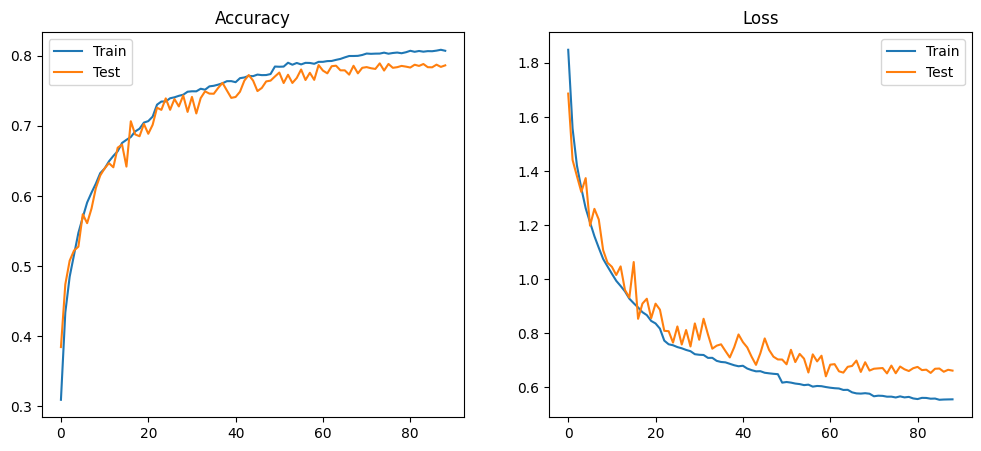

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
datagen.fit(x_train)

# Model architecture
from tensorflow.keras import models, layers

def build_model():
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=2))

    # Block 2
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=2))

    # Global Average Pooling replaces Flatten + Dense
    model.add(layers.GlobalAveragePooling2D())

    # Small final Dense
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Train
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[lr_reduction, early_stop],
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.legend()
plt.show()

In [3]:
model.save('model.keras')

In [4]:
from google.colab import files
files.download("model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import shutil
shutil.make_archive("model_backup", 'zip', "model")  # creates model_backup.zip

from google.colab import files
files.download("model_backup.zip")

FileNotFoundError: [Errno 2] No such file or directory: 'model'